In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/south-german-credit-prediction/SampleSubmission.csv
/kaggle/input/south-german-credit-prediction/train.csv
/kaggle/input/south-german-credit-prediction/test.csv
/kaggle/input/south-german-credit-prediction/DataDescription.csv


In [2]:
# Python ≥3.6 is required
import sys
assert sys.version_info >= (3, 6)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# import usual libraries 
import pandas as pd
import numpy as np

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# consistent sized plots 
from pylab import rcParams
rcParams['figure.figsize'] = 12,5
rcParams['axes.labelsize']= 14
rcParams['xtick.labelsize'] =12
rcParams['ytick.labelsize'] = 12 

# handle operating system dependencies 
import os

# handle unwanted warnings 
import warnings
warnings.filterwarnings(action='ignore',message='^internal gelsd')

In [3]:
# READ THE TRAINING DATA AND TEST DATA INTO DATAFRAMES
train_credit = pd.read_csv('../input/south-german-credit-prediction/train.csv')
test_credit = pd.read_csv('../input/south-german-credit-prediction/test.csv') 

In [4]:
train_credit.head(20)

,Id,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1
5,6,1,8,4,0,3398,1,4,1,3,...,1,39,3,2,2,2,2,1,1,1
6,7,1,6,4,0,1361,1,2,2,3,...,1,40,3,2,1,2,1,1,1,1
7,8,4,18,4,3,1098,1,1,4,2,...,3,65,3,2,2,1,2,1,2,1
8,9,2,24,2,3,3758,3,1,1,2,...,4,23,3,1,1,1,2,1,2,1
9,10,1,11,4,0,3905,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1


In [5]:
train_credit.columns

Index(['Id', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb',
       'kredit'],
      dtype='object')

In [6]:
# assign the corresponding english column names
train_credit.columns = ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk']
test_credit.columns =  ['Id','status', 'duration', 'credit_history', 'purpose', 'amount', 'savings', 'employment_duration', 'installment_rate', 'personal_status_sex', 'other_debtors', 'present_residence', 'property', 'age', 'other_installment_plans', 'housing', 'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker']

In [7]:
# check the dataframe after rename of the columns
train_credit.head(5)

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,0,1,18,4,2,1049,1,2,4,2,...,2,21,3,1,1,3,2,1,2,1
1,1,1,9,4,0,2799,1,3,2,3,...,1,36,3,1,2,3,1,1,2,1
2,2,2,12,2,9,841,2,4,2,2,...,1,23,3,1,1,2,2,1,2,1
3,3,1,12,4,0,2122,1,3,3,3,...,1,39,3,1,2,2,1,1,1,1
4,5,1,10,4,0,2241,1,2,1,3,...,1,48,3,1,2,2,1,1,1,1


In [8]:
train_credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,800.0,478.10125,278.883661,0.0,238.75,472.0,707.25,999.0
status,800.0,2.64875,1.250931,1.0,1.75,2.0,4.00,4.0
duration,800.0,20.49625,12.006881,4.0,12.00,18.0,24.00,72.0
credit_history,800.0,2.58250,1.099866,0.0,2.00,2.0,4.00,4.0
purpose,800.0,2.78500,2.680533,0.0,1.00,2.0,3.00,10.0
amount,800.0,3210.29000,2792.840814,250.0,1364.00,2264.0,3907.25,18424.0
savings,800.0,2.14375,1.589416,1.0,1.00,1.0,3.00,5.0
employment_duration,800.0,3.39500,1.224070,1.0,3.00,3.0,5.00,5.0
installment_rate,800.0,2.95250,1.134395,1.0,2.00,3.0,4.00,4.0
personal_status_sex,800.0,2.68750,0.696743,1.0,2.00,3.0,3.00,4.0


In [9]:
# check info 
train_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       800 non-null    int64
 1   status                   800 non-null    int64
 2   duration                 800 non-null    int64
 3   credit_history           800 non-null    int64
 4   purpose                  800 non-null    int64
 5   amount                   800 non-null    int64
 6   savings                  800 non-null    int64
 7   employment_duration      800 non-null    int64
 8   installment_rate         800 non-null    int64
 9   personal_status_sex      800 non-null    int64
 10  other_debtors            800 non-null    int64
 11  present_residence        800 non-null    int64
 12  property                 800 non-null    int64
 13  age                      800 non-null    int64
 14  other_installment_plans  800 non-null    int64
 15  housin

In [10]:
# explicit check for any null values in the dataframe
train_credit.isnull().sum()

Id                         0
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

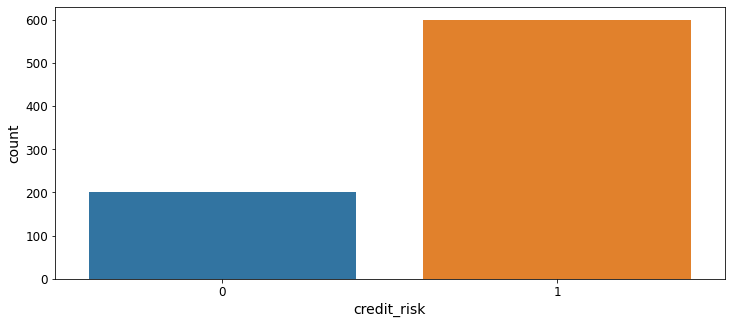

In [11]:
sns.countplot(train_credit['credit_risk'])

* As expected there are way more people with good credit compare to bad credit risk
 
* The dataset is not balanced and accuracy of the model won't be good indication unless trained with balanced data

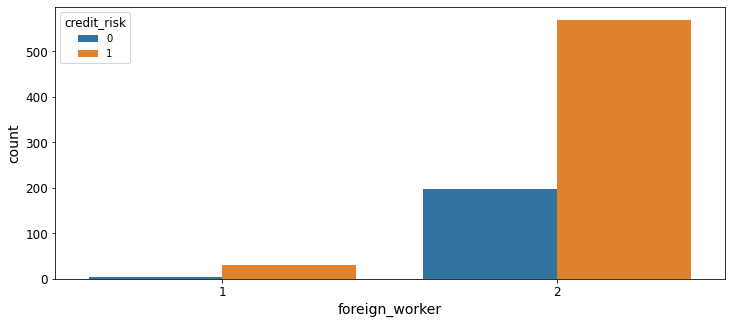

In [12]:
sns.countplot(train_credit['foreign_worker'],hue=train_credit['credit_risk'])

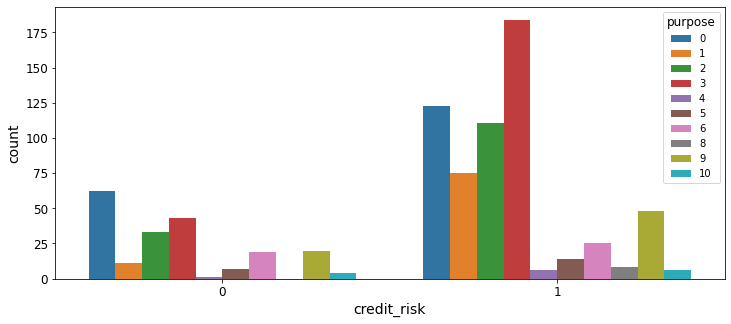

In [13]:
sns.countplot(train_credit['credit_risk'],hue=train_credit['purpose'])

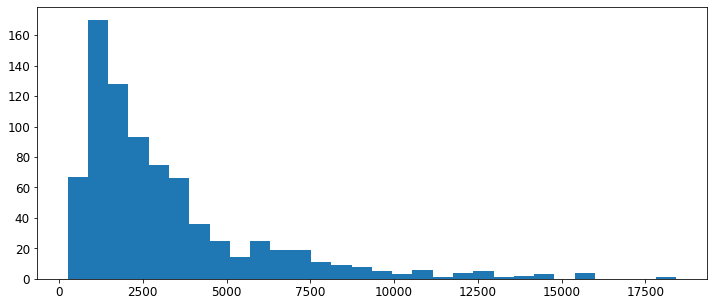

In [14]:
plt.hist(train_credit['amount'],bins=30);

In [15]:
# check the bad loans
train_credit[train_credit['credit_risk']==0]

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
600,45,1,18,2,0,1216,1,2,4,2,...,3,23,3,1,1,3,2,2,2,0
601,47,4,18,4,6,1864,2,3,4,2,...,1,30,3,2,2,3,2,1,2,0
602,171,1,12,2,0,1228,1,3,4,2,...,1,24,3,2,1,2,2,1,2,0
603,234,2,12,2,0,685,1,4,2,4,...,3,25,1,2,1,2,2,1,2,0
604,304,3,9,2,3,745,1,3,3,2,...,1,28,3,2,1,2,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,993,1,18,4,0,3966,1,5,1,2,...,1,33,1,1,3,3,2,2,2,0
796,994,1,12,0,3,6199,1,3,4,3,...,2,28,3,1,2,3,2,2,2,0
797,997,4,21,4,0,12680,5,5,4,3,...,4,30,3,3,1,4,2,2,2,0
798,998,2,12,2,3,6468,5,1,2,3,...,4,52,3,2,1,4,2,2,2,0


Text(0.5, 1.0, 'Bad Loans Amount Histogram')

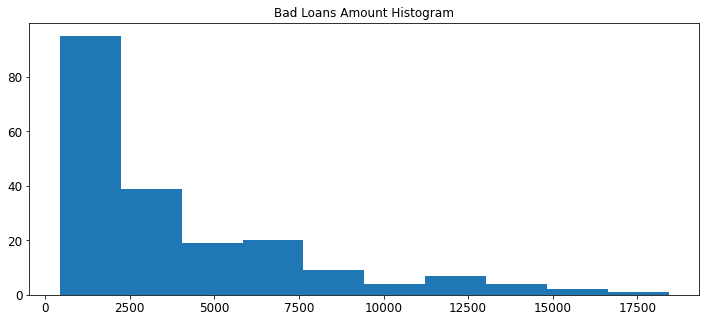

In [16]:
plt.hist(train_credit[train_credit['credit_risk']==0]['amount'])
plt.title('Bad Loans Amount Histogram')

* The badloans is right skewed and with maximum bad loans under 7500
* Highest bad loan could be for the business (can be checked quickly)

In [17]:
# check the good and bad loan risk 
train_credit['credit_risk'].value_counts()

1    600
0    200
Name: credit_risk, dtype: int64

In [18]:
# drop the Id column as it is not useful for the model 
train_credit.drop(['Id'],inplace=True,axis=1)

In [19]:
train_credit.head(3)

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1


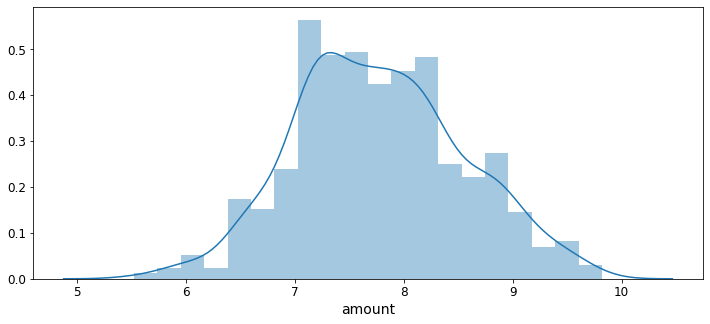

In [20]:
log_amount = np.log(train_credit['amount'])
sns.distplot(log_amount,bins=20)

In [21]:
for i in train_credit.columns:
    print(train_credit[i].value_counts())

4    334
2    215
1    200
3     51
Name: status, dtype: int64
24    149
12    140
18     88
6      65
36     61
15     53
9      41
48     36
30     33
21     25
10     25
60     11
42      9
11      9
20      7
27      7
4       6
8       5
14      4
13      4
39      4
7       4
33      3
22      2
28      2
54      2
16      1
45      1
47      1
5       1
72      1
Name: duration, dtype: int64
2    408
4    250
3     70
1     40
0     32
Name: credit_history, dtype: int64
3     227
0     185
2     144
1      86
9      68
6      44
5      21
10     10
8       8
4       7
Name: purpose, dtype: int64
1478    3
1258    3
1393    3
1262    3
802     2
       ..
2728    1
2210    1
3749    1
4771    1
1024    1
Name: amount, Length: 754, dtype: int64
1    470
5    149
2     86
3     52
4     43
Name: savings, dtype: int64
3    258
5    207
4    145
2    137
1     53
Name: employment_duration, dtype: int64
4    379
2    183
3    121
1    117
Name: installment_rate, dtype: int64
3    448


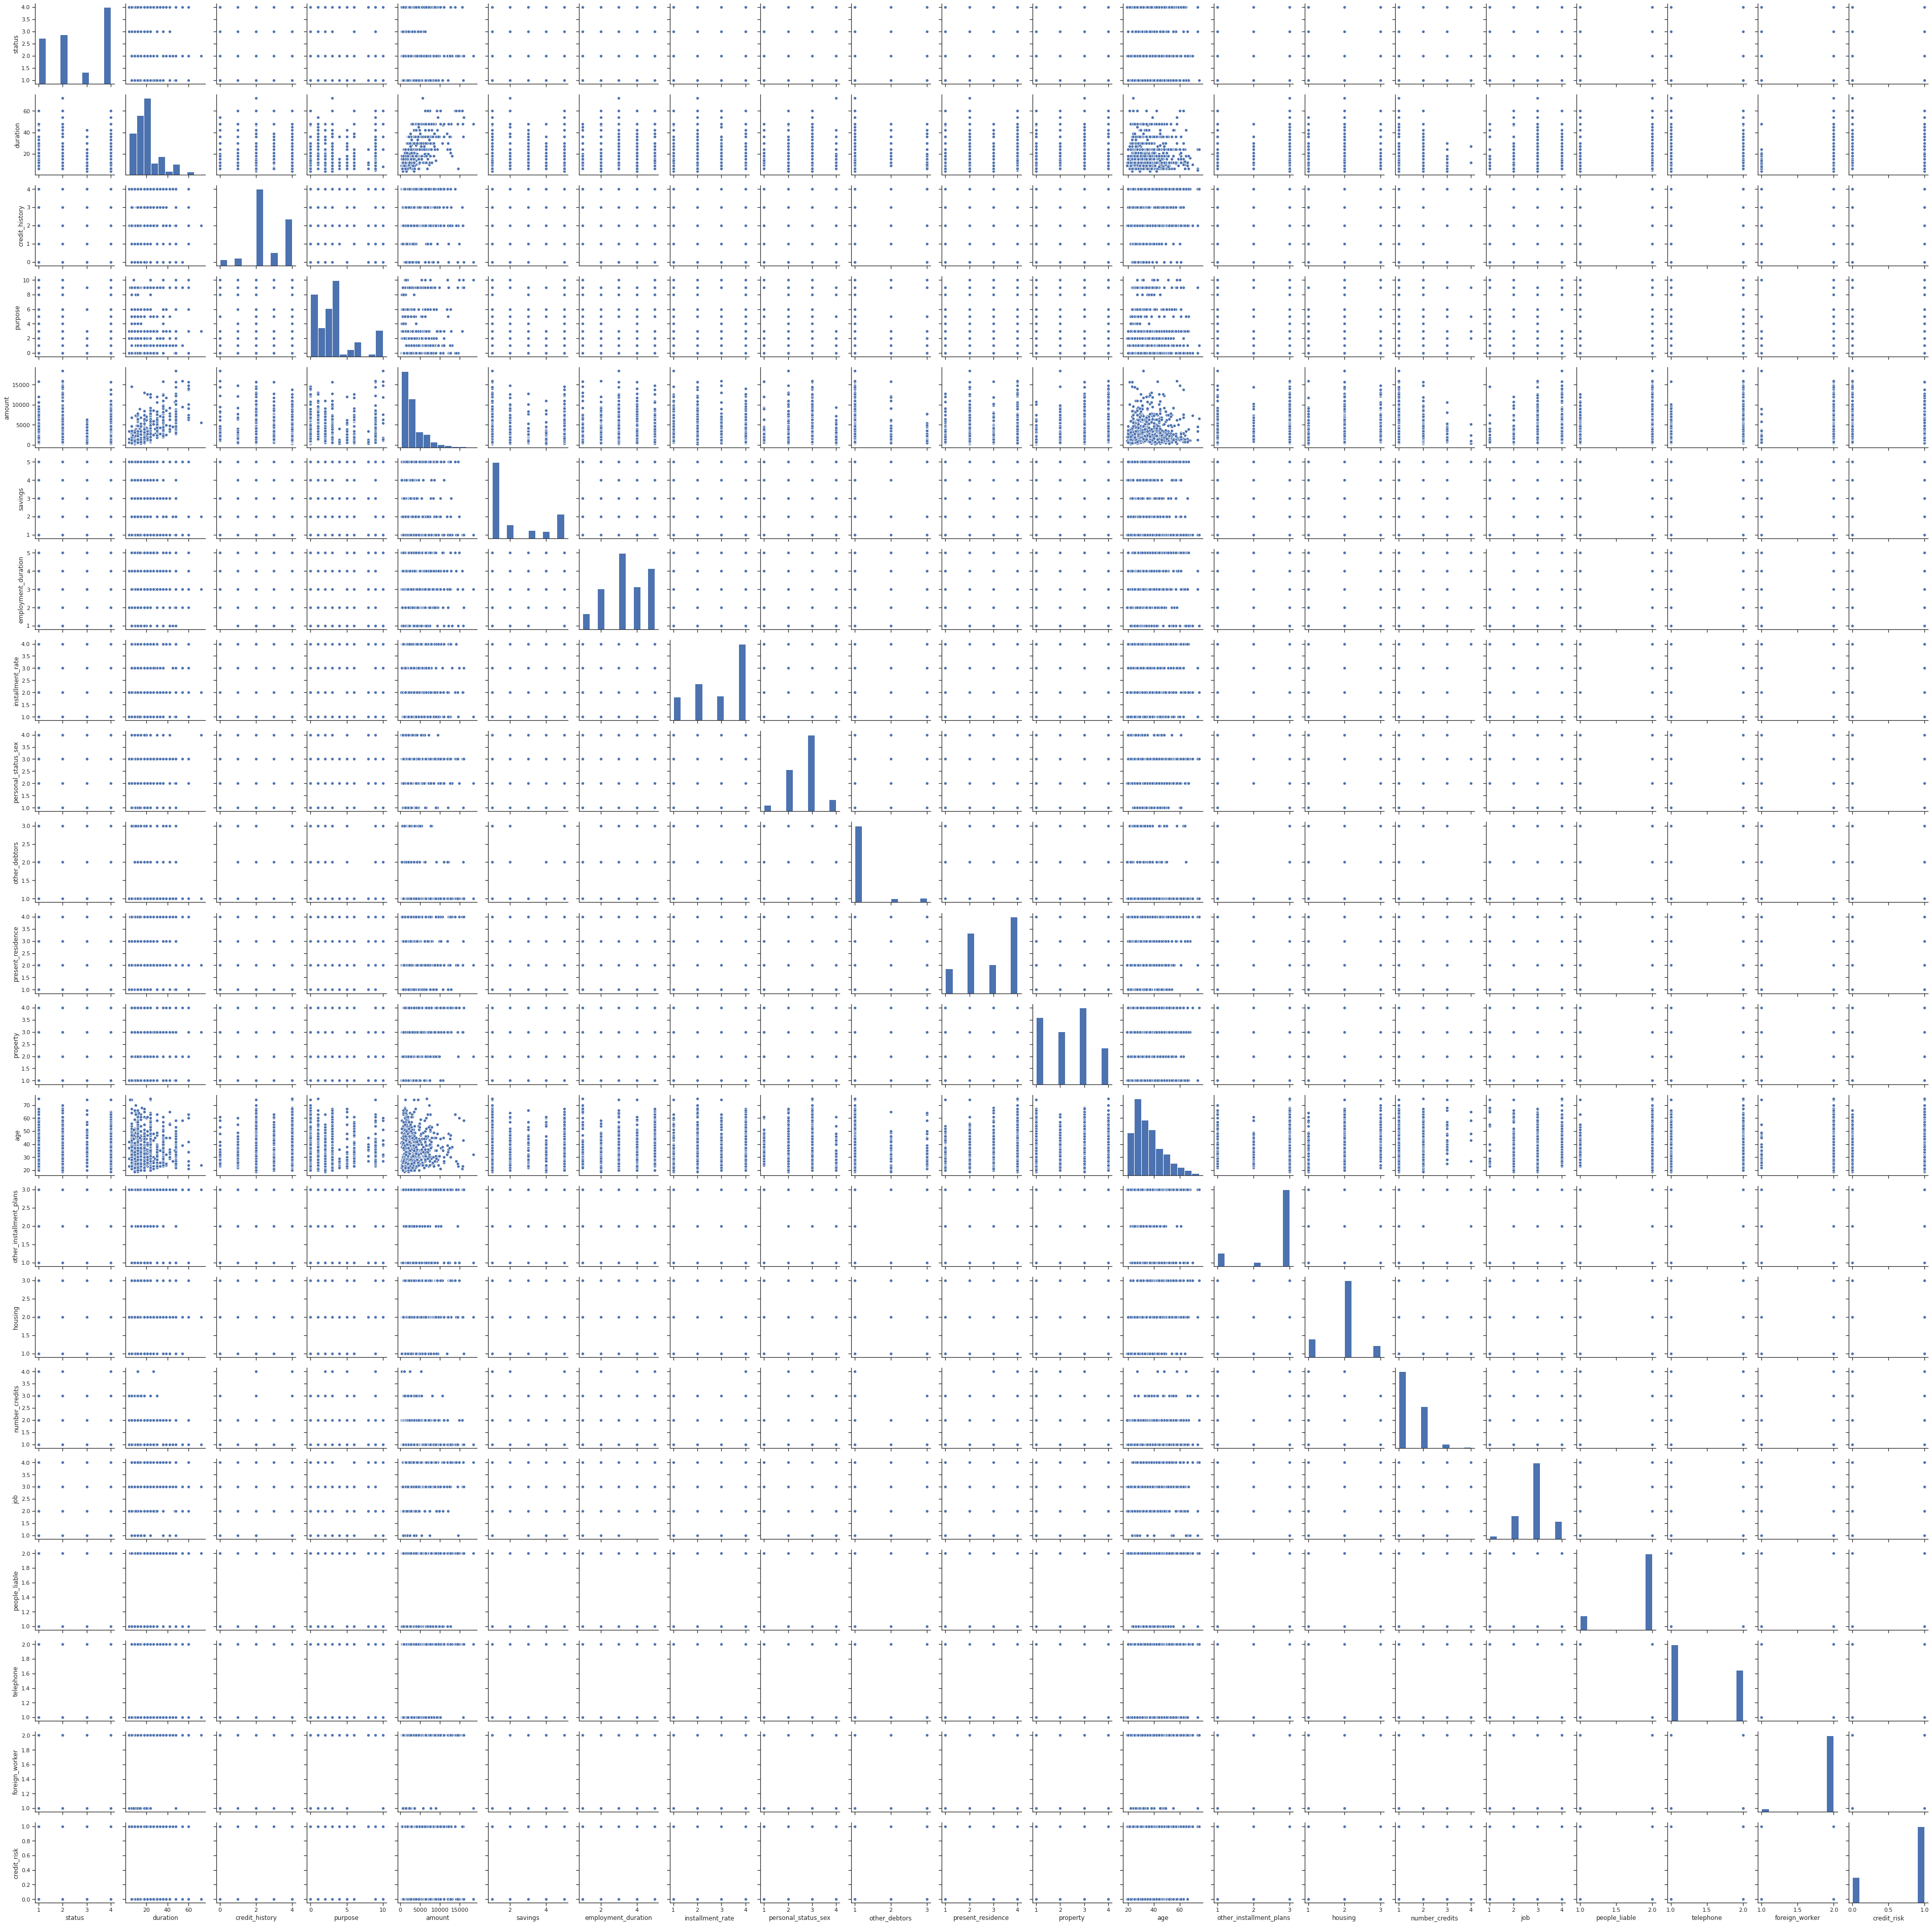

In [22]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(train_credit)

In [23]:
test_credit.shape

(200, 21)

In [24]:
test_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Id                       200 non-null    int64
 1   status                   200 non-null    int64
 2   duration                 200 non-null    int64
 3   credit_history           200 non-null    int64
 4   purpose                  200 non-null    int64
 5   amount                   200 non-null    int64
 6   savings                  200 non-null    int64
 7   employment_duration      200 non-null    int64
 8   installment_rate         200 non-null    int64
 9   personal_status_sex      200 non-null    int64
 10  other_debtors            200 non-null    int64
 11  present_residence        200 non-null    int64
 12  property                 200 non-null    int64
 13  age                      200 non-null    int64
 14  other_installment_plans  200 non-null    int64
 15  housin

In [25]:
test_credit.head()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
0,4,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,2,1,1
1,14,1,18,2,3,1936,5,4,2,4,...,4,3,23,3,1,2,2,2,1,2
2,18,2,36,4,3,2337,1,5,4,3,...,4,1,36,3,2,1,3,2,1,2
3,20,1,6,4,0,3676,1,3,1,3,...,3,1,37,3,1,3,3,1,1,2
4,22,2,36,2,5,2384,1,2,4,3,...,1,4,33,3,1,1,2,2,1,2


In [26]:
test_credit.describe()

,Id,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,...,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,585.095000,2.290000,22.530000,2.395000,3.000000,3515.080000,1.950,3.340000,3.055000,2.660000,...,2.925000,2.375000,35.540000,2.68000,1.875000,1.355000,2.915000,1.845000,1.425000,1.985000
std,311.895834,1.246462,12.158877,1.001995,2.987411,2933.884667,1.536,1.144969,1.052384,0.753151,...,1.116066,1.024511,12.063834,0.69282,0.539286,0.538913,0.624278,0.362813,0.495584,0.121857
min,4.000000,1.000000,6.000000,0.000000,0.000000,338.000000,1.000,1.000000,1.000000,1.000000,...,1.000000,1.000000,20.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,303.000000,1.000000,12.000000,2.000000,1.000000,1373.500000,1.000,3.000000,2.000000,2.000000,...,2.000000,1.000000,26.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,661.000000,2.000000,19.000000,2.000000,2.000000,2443.000000,1.000,3.000000,3.000000,3.000000,...,3.000000,2.000000,33.000000,3.00000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,857.500000,4.000000,30.000000,3.000000,3.000000,4572.500000,2.250,4.000000,4.000000,3.000000,...,4.000000,3.000000,41.250000,3.00000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,996.000000,4.000000,60.000000,4.000000,10.000000,14896.000000,5.000,5.000000,4.000000,4.000000,...,4.000000,4.000000,75.000000,3.00000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


In [27]:
for i in test_credit.columns:
    print(test_credit[i].value_counts())

501    1
684    1
472    1
206    1
613    1
      ..
865    1
864    1
863    1
154    1
968    1
Name: Id, Length: 200, dtype: int64
1    74
4    60
2    54
3    12
Name: status, dtype: int64
12    39
24    35
18    25
36    22
48    12
15    11
6     10
9      8
30     7
27     6
21     5
45     4
10     3
42     2
8      2
60     2
28     1
26     1
39     1
20     1
40     1
16     1
7      1
Name: duration, dtype: int64
2    122
4     43
3     18
1      9
0      8
Name: credit_history, dtype: int64
3     53
0     49
2     37
9     29
1     17
6      6
4      5
10     2
8      1
5      1
Name: purpose, dtype: int64
1344    2
1845    2
3915    1
1236    1
1225    1
       ..
3416    1
6999    1
2389    1
338     1
3077    1
Name: amount, Length: 198, dtype: int64
1    133
5     34
2     17
3     11
4      5
Name: savings, dtype: int64
3    81
5    46
2    35
4    29
1     9
Name: employment_duration, dtype: int64
4    97
2    48
3    36
1    19
Name: installment_rate, dtype: int64


In [28]:
x_test = test_credit.drop(columns="Id",axis=1)

### Prepare data for Machine Learning Models

*     age can be converted to ordinal data, for simplicity went with log transformation
*     further improvement --> create data preparation and transformation pipeline

In [29]:
# import the various classifier models

from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict, cross_val_score,KFold, RepeatedStratifiedKFold

In [30]:
new_data = train_credit.copy()

In [31]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   status                   800 non-null    int64
 1   duration                 800 non-null    int64
 2   credit_history           800 non-null    int64
 3   purpose                  800 non-null    int64
 4   amount                   800 non-null    int64
 5   savings                  800 non-null    int64
 6   employment_duration      800 non-null    int64
 7   installment_rate         800 non-null    int64
 8   personal_status_sex      800 non-null    int64
 9   other_debtors            800 non-null    int64
 10  present_residence        800 non-null    int64
 11  property                 800 non-null    int64
 12  age                      800 non-null    int64
 13  other_installment_plans  800 non-null    int64
 14  housing                  800 non-null    int64
 15  number

In [32]:
new_data['log_amount'] = round(np.log(new_data['amount']),2)

In [33]:
new_data.drop('amount',axis=1,inplace=True)

In [34]:
new_data['log_age'] =  round(np.log(new_data['age']),2)
new_data['log_duration'] = round(np.log(new_data['duration']),2)
new_data.drop(['age','duration'],axis=1,inplace=True)
new_data.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
0,1,4,2,1,2,4,2,1,4,2,...,1,1,3,2,1,2,1,6.96,3.04,2.89
1,1,4,0,1,3,2,3,1,2,1,...,1,2,3,1,1,2,1,7.94,3.58,2.20
2,2,2,9,2,4,2,2,1,4,1,...,1,1,2,2,1,2,1,6.73,3.14,2.48
3,1,4,0,1,3,3,3,1,2,1,...,1,2,2,1,1,1,1,7.66,3.66,2.48
4,1,4,0,1,2,1,3,1,3,1,...,1,2,2,1,1,1,1,7.71,3.87,2.30


In [35]:
new_data.tail()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,...,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk,log_amount,log_age,log_duration
795,1,4,0,1,5,1,2,1,4,1,...,1,3,3,2,2,2,0,8.29,3.50,2.89
796,1,0,3,1,3,4,3,1,2,2,...,1,2,3,2,2,2,0,8.73,3.33,2.48
797,4,4,0,5,5,4,3,1,4,4,...,3,1,4,2,2,2,0,9.45,3.40,3.04
798,2,2,3,5,1,2,3,1,1,4,...,2,1,4,2,2,2,0,8.77,3.95,2.48
799,1,2,2,5,5,4,3,1,4,2,...,2,1,3,2,1,2,0,8.76,3.43,3.40


In [36]:
X_full = new_data.drop('credit_risk',axis=1)
y_full = new_data['credit_risk']

* The data is organized where the last 200 rows has credit risk as 0
* Hence it is important to shuffle the dataset

In [37]:
# this will ensure that the data is randomized and then split into train and test 
# alternatively StratifiedRandomSplit is also recommended
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [38]:
# try various models and pick the best one for further tuning 
def cross_validate(X = X_train,y = y_train):
    
    warnings.filterwarnings(action='ignore',message='')

    models = []
    models.append(('RF',RandomForestClassifier()))
    models.append(('GB',GradientBoostingClassifier()))
    models.append(('SVC',SVC()))
    models.append(('SGD',SGDClassifier()))
    models.append(('LogReg',LogisticRegression()))
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('Bag',BaggingClassifier()))
    models.append(('xgboost',XGBClassifier()))
    models.append(('lightgbm',LGBMClassifier()))
    models.append(('Dtree',DecisionTreeClassifier()))
    

    results = []
    names = []
    scoring ='accuracy'

    for name,model in models:
        #kfold = KFold(n_splits=10,random_state=42)
        kfold = RepeatedStratifiedKFold(n_splits=10,random_state=42,n_repeats=3)
        cv_results = cross_val_score(model,X,y,cv=kfold,scoring=scoring)
        results.append(cv_results)
        names.append(name)
        print (f'Model:{name},Mean: {cv_results.mean()},Std Dev: {cv_results.std()}')

In [39]:
cross_validate(X_train,y_train)

Model:RF,Mean: 0.7822916666666667,Std Dev: 0.03200477394945254
Model:GB,Mean: 0.778125,Std Dev: 0.044997106388448276
Model:SVC,Mean: 0.7572916666666667,Std Dev: 0.016503103664327976
Model:SGD,Mean: 0.6760416666666667,Std Dev: 0.14091020461233064
Model:LogReg,Mean: 0.7703125,Std Dev: 0.04097406128170195
Model:AdaBoost,Mean: 0.7671875,Std Dev: 0.046060634290573985
Model:Bag,Mean: 0.7442708333333333,Std Dev: 0.05597201759336733
Model:xgboost,Mean: 0.7739583333333333,Std Dev: 0.04487637339278753
Model:lightgbm,Mean: 0.7697916666666667,Std Dev: 0.04873619818870661
Model:Dtree,Mean: 0.7088541666666667,Std Dev: 0.04555133417517965


### Prepare the test data

In [40]:
test_sub = test_credit.copy()
test_sub.drop('Id',axis=1,inplace=True)
test_sub['log_amount'] = round(np.log(test_sub['amount']),2)
test_sub['log_age'] =  round(np.log(test_sub['age']),2)
test_sub['log_duration'] = round(np.log(test_sub['duration']),2)
test_sub.drop(['amount','age','duration'],axis=1,inplace=True)
test_sub.head()

,status,credit_history,purpose,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,log_amount,log_age,log_duration
0,1,4,0,1,3,4,3,1,4,2,1,2,2,2,2,1,1,7.68,3.64,2.48
1,1,2,3,5,4,2,4,1,4,3,3,1,2,2,2,1,2,7.57,3.14,2.89
2,2,4,3,1,5,4,3,1,4,1,3,2,1,3,2,1,2,7.76,3.58,3.58
3,1,4,0,1,3,1,3,1,3,1,3,1,3,3,1,1,2,8.21,3.61,1.79
4,2,2,5,1,2,4,3,1,1,4,3,1,1,2,2,1,2,7.78,3.50,3.58


### Balance the data by Oversampling using ADASYN Library

In [41]:
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE # use either ADASYN or SMOTE
from collections import Counter

In [42]:
ada = ADASYN(sampling_strategy='minority',random_state=42,n_neighbors=7)
X_res,y_res = ada.fit_resample(X_train,y_train)
Counter(y_res)

Counter({1: 485, 0: 468})

In [43]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [44]:
cross_validate(X_res,y_res)

Model:RF,Mean: 0.8548391812865498,Std Dev: 0.0399677167599894
Model:GB,Mean: 0.8212682748538014,Std Dev: 0.04066572913667563
Model:SVC,Mean: 0.7712865497076022,Std Dev: 0.030194413156052192
Model:SGD,Mean: 0.680138888888889,Std Dev: 0.08095916199836208
Model:LogReg,Mean: 0.7551864035087716,Std Dev: 0.03771803545332789
Model:AdaBoost,Mean: 0.7611184210526317,Std Dev: 0.0394686542441786
Model:Bag,Mean: 0.8108004385964912,Std Dev: 0.041122882311587804
Model:xgboost,Mean: 0.855529970760234,Std Dev: 0.035584923898591386
Model:lightgbm,Mean: 0.8496198830409356,Std Dev: 0.03935182348715627
Model:Dtree,Mean: 0.7489035087719298,Std Dev: 0.04052235604436738


Based on the above result we will use the best models to fit and predict the score

In [45]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_depth': [2, 4, 6, 8],'booster': ['gbtree','dart'],
              'learning_rate':[0.3,0.5,0.01,0.1]}]
xgb_clf = XGBClassifier(random_state=42)

grid_search = GridSearchCV(xgb_clf, param_grid=param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(X_res,y_res)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=42,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, v

In [46]:
grid_search.best_params_

{'booster': 'gbtree', 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 30}

In [47]:
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=500),
        'max_depth': randint(low=1, high=10),
        'max_features':randint(low=1,high=10),
        
    }

rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='accuracy', random_state=42)
rnd_search.fit(X_res,y_res)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe74756c450>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe74756c210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fe791f45090>},
                   random_state=42, scoring='accuracy')

In [48]:
rnd_search.best_params_
rf_clf = RandomForestClassifier(random_state=42,max_depth=8,max_features=6,n_estimators=386)

In [49]:
# hyper parameters selcted based on grid search 
xgb_clf =  XGBClassifier(n_estimators=30,max_depth=8,random_state=42,learning_rate=0.3,
                        booster='gbtree')
svc_clf = SVC(random_state=42)   # with default paramters
gb_clf = GradientBoostingClassifier(random_state=42) # default parameters
bag_clf = BaggingClassifier(random_state=42,base_estimator=XGBClassifier())
xgb_clf.fit(X_res,y_res)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
rf_clf.fit(X_res,y_res)
RandomForestClassifier(max_depth=8, max_features=6, n_estimators=386,
                       random_state=42)
svc_clf.fit(X_res,y_res)
SVC(random_state=42)
gb_clf.fit(X_res,y_res)
GradientBoostingClassifier(random_state=42)
bag_clf.fit(X_res,y_res)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               gamma=None, gpu_id=None,
                                               importance_type='gain',
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
           

In [51]:
predictions_train_xgb = xgb_clf.predict(X_test)
predictions_train_rf = rf_clf.predict(X_test)
predictions_train_svc = svc_clf.predict(X_test)
predictions_train_gb = gb_clf.predict(X_test)
predictions_train_bag = bag_clf.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print('Accuracy XGBoost...{}'.format(accuracy_score(y_test,predictions_train_xgb)))
print('Accuracy RForest...{}'.format(accuracy_score(y_test,predictions_train_rf)))
print('Accuracy SupportVector...{}'.format(accuracy_score(y_test,predictions_train_svc)))
print('Accuracy GBoost...{}'.format(accuracy_score(y_test,predictions_train_gb)))
print('Accuracy Bagging...{}'.format(accuracy_score(y_test,predictions_train_gb)))

Accuracy XGBoost...0.76875
Accuracy RForest...0.73125
Accuracy SupportVector...0.71875
Accuracy GBoost...0.70625
Accuracy Bagging...0.70625


In [52]:
print('Precision XGBoost...{}'.format(precision_score(y_test,predictions_train_xgb)))
print('Precision RForest...{}'.format(precision_score(y_test,predictions_train_rf)))
print('Precision SupportVector...{}'.format(precision_score(y_test,predictions_train_svc)))
print('Precision GBoost...{}'.format(precision_score(y_test,predictions_train_gb)))
print('Precision Bagging...{}'.format(precision_score(y_test,predictions_train_gb)))

Precision XGBoost...0.8305084745762712
Precision RForest...0.8529411764705882
Precision SupportVector...0.8301886792452831
Precision GBoost...0.8090909090909091
Precision Bagging...0.8090909090909091


In [53]:
print('Recall XGBoost...{}'.format(recall_score(y_test,predictions_train_xgb)))
print('Recall RForest...{}'.format(recall_score(y_test,predictions_train_rf)))
print('Recall SupportVector...{}'.format(recall_score(y_test,predictions_train_svc)))
print('Recall GBoost...{}'.format(recall_score(y_test,predictions_train_gb)))
print('Recall Bagging...{}'.format(recall_score(y_test,predictions_train_gb)))

Recall XGBoost...0.8521739130434782
Recall RForest...0.7565217391304347
Recall SupportVector...0.7652173913043478
Recall GBoost...0.7739130434782608
Recall Bagging...0.7739130434782608


In [54]:
print('XGBoost_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_xgb))
print('RandomForest_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_rf))
print('SupportVector_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_svc))
print('GradientBoosting_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))
print('Bagging_Confusion Matrix')
print(confusion_matrix(y_test,predictions_train_gb))

XGBoost_Confusion Matrix
[[25 20]
 [17 98]]
RandomForest_Confusion Matrix
[[30 15]
 [28 87]]
SupportVector_Confusion Matrix
[[27 18]
 [27 88]]
GradientBoosting_Confusion Matrix
[[24 21]
 [26 89]]
Bagging_Confusion Matrix
[[24 21]
 [26 89]]


In [55]:
train_oversample = pd.concat([X_res,X_test],axis=0)
test_oversample = pd.concat([y_res,y_test],axis=0)
train_oversample.shape

(1113, 20)

In [56]:
train_oversample.columns

Index(['status', 'credit_history', 'purpose', 'savings', 'employment_duration',
       'installment_rate', 'personal_status_sex', 'other_debtors',
       'present_residence', 'property', 'other_installment_plans', 'housing',
       'number_credits', 'job', 'people_liable', 'telephone', 'foreign_worker',
       'log_amount', 'log_age', 'log_duration'],
      dtype='object')

In [57]:
test_oversample.shape # contains 0 and 1 for the credit risk

(1113,)

In [58]:
train_oversample = scalar.fit_transform(train_oversample)
xgb_clf.fit(train_oversample,test_oversample)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=30, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
rf_clf.fit(train_oversample,test_oversample)
svc_clf.fit(train_oversample,test_oversample)
gb_clf.fit(train_oversample,test_oversample)
bag_clf.fit(train_oversample,test_oversample)

BaggingClassifier(base_estimator=XGBClassifier(base_score=None, booster=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               gamma=None, gpu_id=None,
                                               importance_type='gain',
                                               interaction_constraints=None,
                                               learning_rate=None,
                                               max_delta_step=None,
                                               max_depth=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               n_estimators=100, n_jobs=None,
           

In [60]:
predictions_final_xgb = xgb_clf.predict(scalar.transform(test_sub))
predictions_final_rf = rf_clf.predict(scalar.transform(test_sub))
predictions_final_svc = svc_clf.predict(scalar.transform(test_sub))
predictions_final_gb = gb_clf.predict(scalar.transform(test_sub))
predictions_final_bag = bag_clf.predict(scalar.transform(test_sub))

### Multiple Model Voting
**If atleast 2 models predict credit risk as 1, then final score is 1 else it is 0**

In [61]:
s_xgb = pd.Series(predictions_final_xgb, name='XGB')
s_rf = pd.Series(predictions_final_rf, name='RF')
s_svc = pd.Series(predictions_final_svc, name='SVC')
s_gb = pd.Series(predictions_final_gb, name='GB')
s_bag = pd.Series(predictions_final_bag, name='BAG')
idx = test_credit['Id']

In [62]:
model_pred = pd.concat([idx,s_xgb,s_rf,s_svc,s_gb,s_bag],axis=1)
model_pred.head()

,Id,XGB,RF,SVC,GB,BAG
0,4,1,1,1,1,1
1,14,1,1,1,1,1
2,18,1,1,1,1,1
3,20,1,1,1,1,1
4,22,0,0,0,0,0


In [63]:
model_pred['vote'] = model_pred[['XGB','RF','SVC','GB','BAG']].sum(axis=1)

In [64]:
model_pred.head()

,Id,XGB,RF,SVC,GB,BAG,vote
0,4,1,1,1,1,1,5
1,14,1,1,1,1,1,5
2,18,1,1,1,1,1,5
3,20,1,1,1,1,1,5
4,22,0,0,0,0,0,0


In [65]:
# criteria to select the final credit risk score 
def vote(vote_sum):
    if vote_sum >=2:
        return 1
    else:
        return 0

In [66]:
model_pred['kredit'] = model_pred['vote'].apply(vote)

In [67]:
model_pred.tail()

,Id,XGB,RF,SVC,GB,BAG,vote,kredit
195,982,1,0,1,0,1,3,1
196,984,1,1,1,1,1,5,1
197,988,0,0,0,0,0,0,0
198,995,0,0,0,0,0,0,0
199,996,1,0,0,1,1,3,1


In [68]:
submission = model_pred.drop(['XGB','RF','SVC','GB','BAG','vote'],axis=1)

In [69]:
submission.tail(20)

,Id,kredit
180,947,1
181,949,1
182,950,0
183,953,1
184,957,0
185,958,0
186,960,1
187,963,0
188,965,0
189,968,0


In [70]:
submission.to_csv('AggregatedModel_Predictions.csv',index=False)

### Train Artificial Neural Network - Optional Step

In [71]:
scalar = StandardScaler()
X_res_sc =  scalar.fit_transform(X_res)
X_test_sc = scalar.transform(X_test)

In [72]:
X_train_ar = np.asarray(X_res_sc)
y_train_ar = np.asarray(y_res)
X_test_ar = np.asarray(X_test_sc)
y_test_ar = np.asarray(y_test)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras

In [74]:
keras.backend.clear_session()
model_ann = Sequential()

# add 3 dense layers and the final output layer
model_ann.add(Flatten())
model_ann.add(Dense(units=300)) # activations relu,tanh,elu all resulted in exploding val_loss
model_ann.add(Dense(units=200))
model_ann.add(Dense(units=100))
model_ann.add(Dropout(0.5))
model_ann.add(Dense(units=10))


# final output layer
model_ann.add(Dense(units=1,activation='sigmoid'))

# compile the model
model_ann.compile(optimizer='nadam',metrics=['accuracy'],loss='binary_crossentropy')

In [75]:
early_stop = EarlyStopping(patience=50,monitor='val_loss',restore_best_weights=True)

In [76]:
model_ann.fit(X_train_ar,y_train_ar,epochs=300,callbacks=[early_stop],
             validation_data=(X_test_ar,y_test_ar))

Epoch 1/300
30/30 [==============================] - 0s 10ms/step - loss: 0.5785 - accuracy: 0.6999 - val_loss: 0.5675 - val_accuracy: 0.6812
Epoch 2/300
30/30 [==============================] - 0s 5ms/step - loss: 0.5642 - accuracy: 0.7240 - val_loss: 0.5506 - val_accuracy: 0.7000
Epoch 3/300
30/30 [==============================] - 0s 5ms/step - loss: 0.5383 - accuracy: 0.7366 - val_loss: 0.5497 - val_accuracy: 0.6938
Epoch 4/300
30/30 [==============================] - 0s 5ms/step - loss: 0.5206 - accuracy: 0.7513 - val_loss: 0.5371 - val_accuracy: 0.7312
Epoch 5/300
30/30 [==============================] - 0s 5ms/step - loss: 0.5243 - accuracy: 0.7566 - val_loss: 0.5398 - val_accuracy: 0.7125
Epoch 6/300
30/30 [==============================] - 0s 5ms/step - loss: 0.5113 - accuracy: 0.7608 - val_loss: 0.5438 - val_accuracy: 0.7125
Epoch 7/300
30/30 [==============================] - 0s 5ms/step - loss: 0.5160 - accuracy: 0.7576 - val_loss: 0.5337 - val_accuracy: 0.7000
Epoch 8/300


In [77]:
predictions_ann = model_ann.predict_classes(X_test_ar)

In [78]:
print(accuracy_score(y_test,predictions_ann))

0.7125
